# Lab 4
https://colab.research.google.com/drive/13d_oQJjOEXQgiCsLxMjnrJTTizVzmYFW?usp=sharing

1 importing the required dependancies

In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

2 reading the files into a dataframe

In [ ]:
train = pd.read_csv('/content/trainT.csv')

3 displaying the first 5 lines and shape of the dataset

In [ ]:
display(train.head())
print(train.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)


4 taking few columns of train to make a new dataframe

In [ ]:
df = train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

5 Label Encoding for the 'Sex' column ie converting the male to 0 and female to 1

In [ ]:
df['Sex'] = df['Sex'].apply(lambda sex:1 if sex=='male' else 0)

#Alternate approaches to label encoding 
# df['Sex'] = df['Sex'].map({'male':0, 'female':1})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


6 checking the number of NA's present in the dataset

In [ ]:
print("Checking the NA's in the dataframe")
display(df.isna().sum())
print("\nInfo of the datset\n")
display(df.info())

Checking the NA's in the dataframe


Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64


Info of the datset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


None

7 filling the NA values with the median of the column

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].fillna(df['Age'].median()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#verifying the fillna function
df['Age'].isna().sum()

0

8 Splitting the dataset into target and instance values 

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

9 Splitting the dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#using the help function to get the parameters and the other details about the train_test_split
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_s

10 Generating accuracy score, classification report, confusion matrix.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

def get_accuracy_metrics(y_test, y_hat):

  #Generating accuracy score
  print("\nAccuracy attained : {}\n".format(accuracy_score(y_hat,y_test)))

  #Getting the classification matrix
  print("The classification report is :\n\n{}".format(classification_report(y_test, y_hat)))

  #Confusion matrix
  # print("Confusion matrix generated"confusion_matrix(y_test, y_hat))
  print("\n")
  sns.heatmap(confusion_matrix(y_test, y_hat),annot=True,fmt='g', square=True)

def plot_accuracies(y_hat,model=''):
  
  x,accs=[],[]
  max_x,max_acc = 0,0

  for i in range(0,105,5):
    x.append(i)
    z=[]
    for row in y_hat*100:
      if max(row)>i:
        z.append(np.argmax(row))
      else :
        z.append(np.argmin(row))
    accs.append(accuracy_score(z,y_test))
    if accuracy_score(z,y_test)>max_acc : 
      max_acc = accuracy_score(z,y_test)
      max_x = i
    else : 
      continue

  plt.plot(x,accs)
  plt.axvline(x=max_x,label='line at x = {}, value is {}'.format(max_x, max_acc), color='red')
  plt.title("Accuracies of various thresholds of {}".format(model))
  plt.xlabel("Value of threshold")
  plt.ylabel("Accuracy")
  plt.legend()

  return accs,x

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Accuracy attained : 0.8059701492537313

The classification report is :

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       168
           1       0.74      0.73      0.74       100

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268





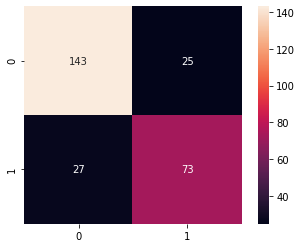

In [ ]:
from sklearn.linear_model import LogisticRegression

#making logistic regression variable
logit = LogisticRegression(random_state=0)

#fitting the model
logit.fit(X_train,y_train)

print(logit.get_params()) #to get the parameters of the model
# print(logit.coef_)

#making predictions
get_accuracy_metrics(y_test, logit.predict(X_test))

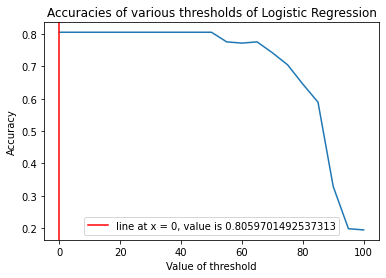

In [ ]:
#getting probability predictions so as to apply threshold of the partition to get better classifier
y_hat = logit.predict_proba(X_test)
acscs_logit,x_logit = plot_accuracies(y_hat, 'Logistic Regression')

11 Naive Bayes model for classification 

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy attained : 0.7798507462686567

The classification report is :

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       168
           1       0.69      0.75      0.72       100

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268





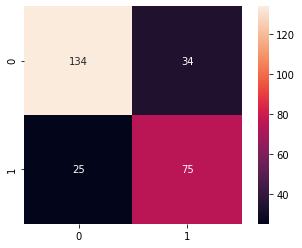

In [ ]:
get_accuracy_metrics(y_test, gnb.predict(X_test))

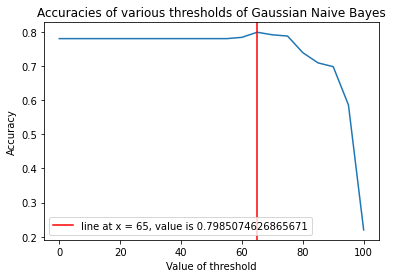

In [ ]:
y_hat = gnb.predict_proba(X_test)
acscs_nb, x_nb = plot_accuracies(y_hat,'Gaussian Naive Bayes')

12 Comparision b/w models

In [ ]:
def plotter(model_names, accs, x):
  i=0
  for acc in accs:
    plt.plot(x, acc, label= model_names[i])
    i+=1
  plt.title("Comparision of the model predictions for various thresholds",fontdict={'fontsize':15})
  plt.xlabel("Value of threshold",fontdict={'fontsize':8})
  plt.ylabel("Accuracy",fontdict={'fontsize':8})
  plt.legend()

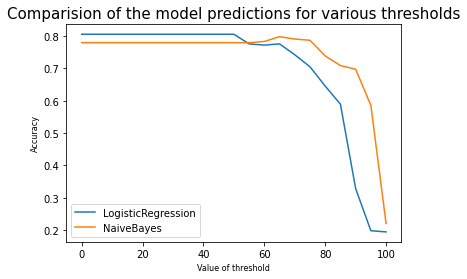

In [ ]:
model_names = ['LogisticRegression', 'NaiveBayes']
accs = [acscs_logit ,acscs_nb]

plotter(model_names,accs, x)

13 Pickle dump for saving the model

In [ ]:
#Saving the model using pickle
filename = 'lr.sav'
pickle.dump(logit, open(filename, 'wb'))

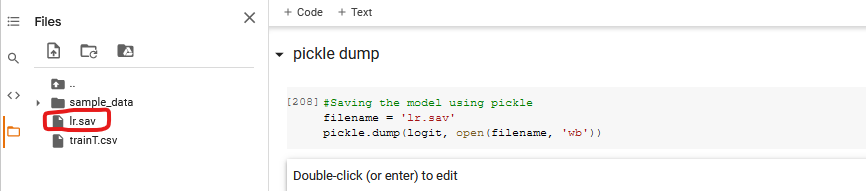

The saved model is shown in the files section


Accuracy attained : 0.8059701492537313

The classification report is :

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       168
           1       0.74      0.73      0.74       100

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268





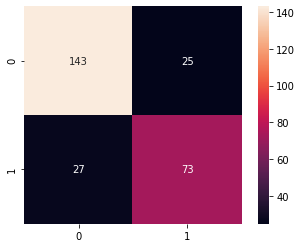

In [ ]:
# Sanity check after oading the model back from pickle
logit = pickle.load(open(filename, 'rb'))
get_accuracy_metrics(y_test, logit.predict(X_test))

PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['Survived']]], axis = 1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


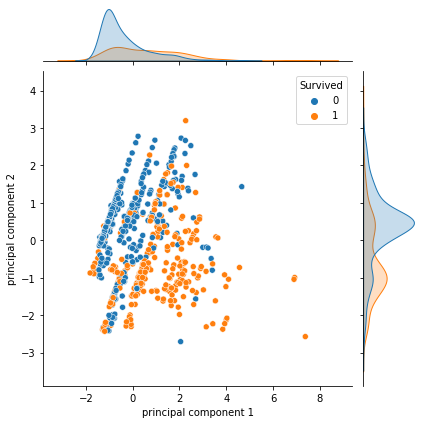

In [ ]:
sns.jointplot(finalDf['principal component 1'], finalDf['principal component 2'], hue=finalDf['Survived'])